# 19 Exercise - Advanced - Skill Pay Analysis

In [1]:
# import librairies

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# clean data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [4]:
# look at data analyst in the US

df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy().dropna(subset="salary_year_avg")

# explode the skills
df_DA_US = df_DA_US.explode("job_skills")

In [ ]:
# we need a couple of data frames now to know 
    # 1 - top 10 most popular skill and median salary per skill
    # 2 - top 10 highest paying skill based on median salary

df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])

df_DA_top_pay = df_DA_US_group.sort_values(by="median", ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by="count", ascending=False).head(10).sort_values(by="median", ascending=False).head(10) # sorting twice to have the appropriate ordering

df_DA_US_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


: 

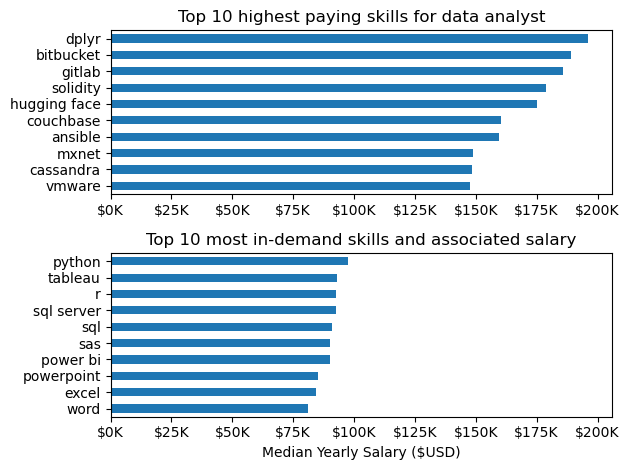

In [28]:
# because we want to have 2 graphs, we need to run the subplit function to have a 2x1 graph

fig, ax = plt.subplots(2, 1)

df_DA_top_pay.plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title("Top 10 highest paying skills for data analyst")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

df_DA_skills.plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim()) # setting the x-axis of the bottom one to be exactly the same as the top one! Pretty neat
ax[1].set_title("Top 10 most in-demand skills and associated salary")
ax[1].set_xlabel("Median Yearly Salary ($USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

plt.tight_layout()
plt.show()